In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv('car.data', names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,3,2,med,low,unacc
freq,432,432,432,576,576,576,1210


In [3]:
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
print('unique values in buying: ',df['buying'].unique())
print('unique values in maintainace: ',df['maint'].unique())
print('unique values in doors: ',df['doors'].unique())
print('unique values in persons: ',df['persons'].unique())
print('unique values in lug_boot: ',df['lug_boot'].unique())
print('unique values in saefty: ',df['safety'].unique())
print('unique values in class: ',df['class'].unique())

unique values in buying:  ['vhigh' 'high' 'med' 'low']
unique values in maintainace:  ['vhigh' 'high' 'med' 'low']
unique values in doors:  ['2' '3' '4' '5more']
unique values in persons:  ['2' '4' 'more']
unique values in lug_boot:  ['small' 'med' 'big']
unique values in saefty:  ['low' 'med' 'high']
unique values in class:  ['unacc' 'acc' 'vgood' 'good']


In [5]:
df['buying'] = df['buying'].map({'vhigh':4, 'high':3, 'med':2, 'low':1})
df['maint'] = df['maint'].map({'vhigh':4, 'high':3, 'med':2, 'low':1})
df['doors'] = df['doors'].map({'2':1, '3':2, '4':3, '5more':4})
df['persons'] = df['persons'].map({'2':1, '4':2, 'more':3})
df['lug_boot'] = df['lug_boot'].map({'small':1, 'med':2, 'big':3})
df['safety'] = df['safety'].map({'low':1, 'med':2, 'high':3})
df['class'] = df['class'].map({'unacc':1, 'acc':2, 'vgood':4, 'good':3})

In [6]:
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1
5,4,4,1,1,2,3,1
6,4,4,1,1,3,1,1
7,4,4,1,1,3,2,1
8,4,4,1,1,3,3,1
9,4,4,1,2,1,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CFFD4FB48>,
      dtype=object)

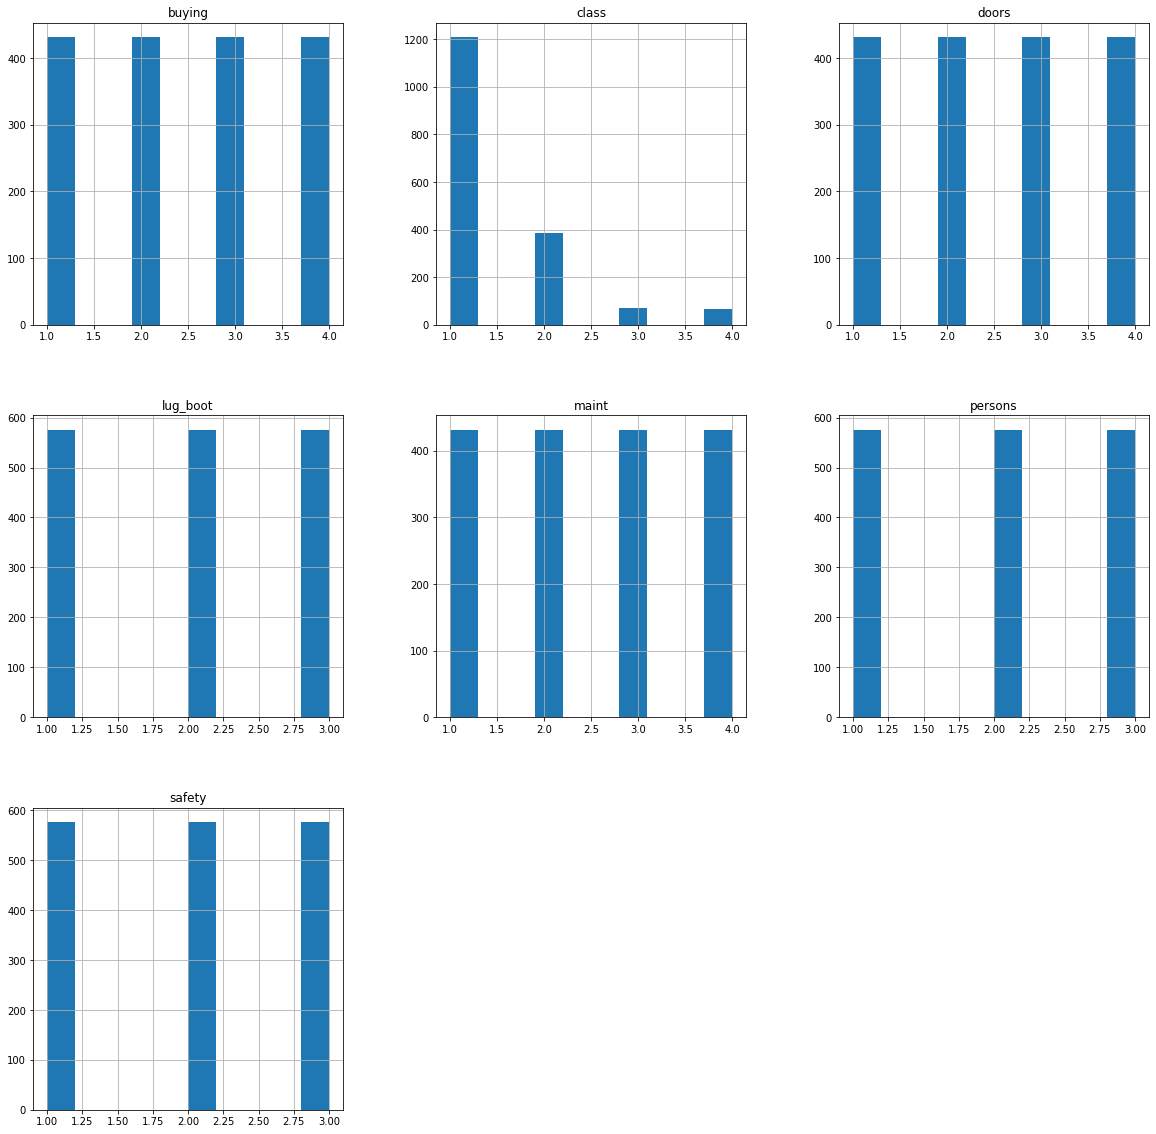

In [7]:
df.hist(bins=10, figsize=(20,20))

In [8]:
corr = df.corr()
corr['class']

buying     -0.282750
maint      -0.232422
doors       0.066057
persons     0.341707
lug_boot    0.157932
safety      0.439337
class       1.000000
Name: class, dtype: float64

In [9]:
df = df.sample(frac=1)

In [10]:
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
518,3,4,4,1,2,3,1
399,4,1,3,3,2,1,1
331,4,1,1,1,3,2,1
1009,2,3,2,2,1,2,1
1149,2,2,3,2,3,1,1
627,3,3,4,1,3,1,1
892,2,4,2,1,1,2,1
178,4,3,3,2,3,2,1
1505,1,3,4,3,1,3,2
1298,1,4,1,1,1,3,1


In [11]:
df_train = df.iloc[range(1400)]

In [12]:
df_train

,buying,maint,doors,persons,lug_boot,safety,class
518,3,4,4,1,2,3,1
399,4,1,3,3,2,1,1
331,4,1,1,1,3,2,1
1009,2,3,2,2,1,2,1
1149,2,2,3,2,3,1,1
...,...,...,...,...,...,...,...
834,3,1,3,3,3,1,1
1396,1,4,4,3,1,2,1
879,2,4,1,2,3,1,1
1408,1,3,1,1,2,2,1


In [13]:
df_test = df.iloc[range(1400,1728)]

In [14]:
df_test

,buying,maint,doors,persons,lug_boot,safety,class
1233,2,1,2,3,1,1,1
1641,1,1,1,3,2,1,1
1650,1,1,2,1,2,1,1
209,4,3,4,3,1,3,1
1382,1,4,4,1,2,3,1
...,...,...,...,...,...,...,...
1466,1,3,3,1,3,3,1
47,4,4,2,3,1,3,1
1727,1,1,4,3,3,3,4
381,4,1,3,1,2,1,1


In [15]:
df.to_csv('modified.csv')

In [16]:
df_train.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
518,3,4,4,1,2,3,1
399,4,1,3,3,2,1,1
331,4,1,1,1,3,2,1
1009,2,3,2,2,1,2,1
1149,2,2,3,2,3,1,1
627,3,3,4,1,3,1,1
892,2,4,2,1,1,2,1
178,4,3,3,2,3,2,1
1505,1,3,4,3,1,3,2
1298,1,4,1,1,1,3,1


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf = DecisionTreeClassifier(random_state=0)

In [19]:
trail_train = df_train.drop(columns = ['class'])
ans_trail = df_train['class']

In [20]:
trail_train.head(10)

,buying,maint,doors,persons,lug_boot,safety
518,3,4,4,1,2,3
399,4,1,3,3,2,1
331,4,1,1,1,3,2
1009,2,3,2,2,1,2
1149,2,2,3,2,3,1
627,3,3,4,1,3,1
892,2,4,2,1,1,2
178,4,3,3,2,3,2
1505,1,3,4,3,1,3
1298,1,4,1,1,1,3


In [21]:
cross_val_score(clf, trail_train, ans_trail, cv=10)

array([0.9929078 , 0.97163121, 0.98571429, 0.98571429, 0.97142857,
       0.98571429, 0.95714286, 0.96428571, 0.99280576, 0.99280576])

In [22]:
clf.fit(trail_train, ans_trail)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [23]:
o = clf.predict(df_test.drop(columns = ['class']))

In [24]:
o

array([1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 3, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 4, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 4,
       1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3,
       1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 3, 2, 2, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 4, 1, 1, 2, 1, 4, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,

In [25]:
df_test.iloc[1][2]

1

In [26]:
##########################################################################333

In [27]:
def calc_entropy(data,col_name, done):
#     counts = np.bincount(column)
#     probabilities = counts / len(column)
    a=0 # coutnt 1
    b=0 # coutnt 2
    c=0 # coutnt 3
    d=0 # coutnt 4
    i = -1
    for value in data[col_name]:
        i = i+1
        if data.iloc[i][1]==done[1] or done[1]==0:
            if data.iloc[i][2]==done[2] or done[2]==0:
                if data.iloc[i][3]==done[3] or done[3]==0:
                    if data.iloc[i][4]==done[4] or done[4]==0:
                        if data.iloc[i][5]==done[5] or done[5]==0:
                            if data.iloc[i][0]==done[0] or done[0]==0:
                                if value == 1:
                                    a=a+1
                                elif value == 2:
                                    b=b+1
                                elif value == 3:
                                    c=c+1
                                elif value == 4:
                                    d=d+1
    probab_a = 0.25
    probab_b = 0.25
    probab_c = 0.25
    probab_d = 0.25
    if(a+b+c+d!=0):
        probab_a = a/(a+b+c+d)
        probab_b = b/(a+b+c+d)
        probab_c = c/(a+b+c+d)
        probab_d = d/(a+b+c+d)
    probabilities=[probab_a,probab_b,probab_c,probab_d]
    entropy = 0
    for prob in probabilities:
        if prob > 0:
            entropy += prob * math.log(prob, 2)
    
    return -entropy

def calc_information_gain(data,done, split_name, target_name):
    # Calculate the original entropy
    original_entropy = calc_entropy(data,target_name,done)
    
    #Find the unique values in the column
    values = data[split_name].unique()
    n = len(values)
    if n==4:
        left_split = data[data[split_name] == values[0]]
        right_split = data[data[split_name] == values[1]]
        leftmost_split = data[data[split_name] == values[2]]
        rightmost_split = data[data[split_name] == values[3]]
        # Loop through the splits and calculate the subset entropies
        to_subtract = 0
        for subset in [left_split, right_split, leftmost_split, rightmost_split]:
            prob = (subset.shape[0] / data.shape[0]) 
            to_subtract += prob * calc_entropy(subset,target_name,done)

        # Return information gain
        return original_entropy - to_subtract  
    if n==3:
        left_split = data[data[split_name] == values[0]]
        right_split = data[data[split_name] == values[1]]
        leftmost_split = data[data[split_name] == values[2]]
        # Loop through the splits and calculate the subset entropies
        to_subtract = 0
        for subset in [left_split, right_split, leftmost_split]:
            prob = (subset.shape[0] / data.shape[0]) 
            to_subtract += prob * calc_entropy(subset,target_name,done)

        # Return information gain
        return original_entropy - to_subtract

columns = ['buying', 'maint', 'doors' , 'persons', 'lug_boot', 'safety'] #['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
def highest_info_gain(columns,done):
    information_gains = {}
    i=0
    for col in columns:
        information_gain=0
        if(done[i]==0):
            information_gain = calc_information_gain(df_train,done, col, 'class')
        information_gains[col] = information_gain
        i=i+1

    return max(information_gains, key=information_gains.get)



def fun(data,done):
    ch=0
    for i in done:
        if(i==0):
            ch=1
    if(ch==0):
        hig='yo'
    else:
        hig=highest_info_gain(columns,done)
    a=0
    b=0
    c=0
    d=0
    i=0
    for value in data['class']:#['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
        if data.iloc[i][0]==done[0] or done[0]==0:
            if data.iloc[i][1]==done[1] or done[1]==0:
                if data.iloc[i][2]==done[2] or done[2]==0:
                    if data.iloc[i][3]==done[3] or done[3]==0:
                        if data.iloc[i][4]==done[4] or done[4]==0:
                            if data.iloc[i][5]==done[5] or done[5]==0:
                                if value == 1:
                                    a=a+1
                                elif value == 2:
                                    b=b+1
                                elif value == 3:
                                    c=c+1
                                elif value ==4:
                                    d=d+1
        i = i+1
    probab_a = 0
    probab_b = 0
    probab_c = 0
    probab_d = 0
    if(a+b+c+d!=0):
        probab_a = a/(a+b+c+d)
        probab_b = b/(a+b+c+d)
        probab_c = c/(a+b+c+d)
        probab_d = d/(a+b+c+d)
    return (hig , probab_a , probab_b , probab_c , probab_d)
def mx(p1,p2,p3,p4):
    if(p1>=p2 and p1>=p3 and p1>=p4):
        return -1
    if(p2>=p1 and p2>=p3 and p2>=p4):
        return -2
    if(p3>=p2 and p3>=p1 and p3>=p4):
        return -3
    if(p4>=p2 and p4>=p3 and p4>=p1):
        return -4
    
    
class node: 
    def __init__(self, key): 
        self.left_most = None
        self.left= None
        self.right_most= None
        self.right = None
        self.val = key
        
        
def create(data, done, head):
    
    vk,p1,p2,p3,p4 = fun(data, done)
    print(vk,end=' ')
    print(p1,end=' ')
    print(p2,end=' ')
    print(p3,end=' ')
    print(p4,end=' ')
    if p1==0 and p2==0 and p3==0 and p4==0:
        head.val=-5
        return
               #'buying', 'maint', 'doors' , 'persons', 'lug_boot', 'safety'
    if(vk=='buying'):
        v=0
    if(vk=='maint'):
        v=1
    if(vk=='doors'):
        v=2
    if(vk=='persons'):
        v=3
    if(vk=='lug_boot'):
        v=4
    if(vk=='safety'):
        v=5
   
   
    print(done)
    if (p1>=0.75):
        head.val=-1
        return 
    if (p2>=0.75):
        head.val=-2
        return
    if (p3>=0.75):
        head.val=-3
        return
    if (p4>=0.75):
        head.val=-4
        return
    ch=0
    for i in done:
        if(i==0):
            ch=1
    if(ch==0 or vk=='yo'):
        head.val= mx(p1,p2,p3,p4)
        return
    if(done[v]!=0):
        head.val=-5
        return
    
    head.val=v
    head.left_most= node(-5)
    head.left=node(-5)
    head.right=node(-5)
    head.right_most=node(-5)
    done[v]=1
    create(data, done, head.left_most)
    done[v]=2
    create(data, done, head.left)
    done[v]=3
    create(data, done, head.right)
    done[v]=4
    create(data, done, head.right_most)
    done[v]=0
    return

def dtree(data, head):
    if(head.val<0):
        return -1*head.val
    if(data[head.val]==1):
        return dtree(data, head.left_most)
    if(data[head.val]==2):
        return dtree(data, head.left)
    if(data[head.val]==3):
        return dtree(data, head.right)
    if(data[head.val]==4):
        return dtree(data, head.right_most)

In [28]:
head = node(0)

In [29]:
d = [0, 0, 0, 0, 0, 0]

In [30]:
create(df_train, d, head) # will create head to decision tree

safety 0.6914285714285714 0.22857142857142856 0.04285714285714286 0.037142857142857144 [0, 0, 0, 0, 0, 0]
buying 1.0 0.0 0.0 0.0 [0, 0, 0, 0, 0, 1]
persons 0.6131078224101479 0.3150105708245243 0.07188160676532769 0.0 [0, 0, 0, 0, 0, 2]
buying 1.0 0.0 0.0 0.0 [0, 0, 0, 1, 0, 2]
buying 0.4230769230769231 0.4807692307692308 0.09615384615384616 0.0 [0, 0, 0, 2, 0, 2]
maint 0.10256410256410256 0.6410256410256411 0.2564102564102564 0.0 [1, 0, 0, 2, 0, 2]
lug_boot 0.0 0.4444444444444444 0.5555555555555556 0.0 [1, 1, 0, 2, 0, 2]
buying 0.0 1.0 0.0 0.0 [1, 1, 0, 2, 1, 2]
buying 0.0 0.0 1.0 0.0 [1, 1, 0, 2, 2, 2]
buying 0.0 0.0 1.0 0.0 [1, 1, 0, 2, 3, 2]
doors 0 0 0 0 lug_boot 0.0 0.4444444444444444 0.5555555555555556 0.0 [1, 2, 0, 2, 0, 2]
buying 0.0 1.0 0.0 0.0 [1, 2, 0, 2, 1, 2]
doors 0.0 0.5 0.5 0.0 [1, 2, 0, 2, 2, 2]
yo 0.0 1.0 0.0 0.0 [1, 2, 1, 2, 2, 2]
yo 0.0 1.0 0.0 0.0 [1, 2, 2, 2, 2, 2]
yo 0.0 0.0 1.0 0.0 [1, 2, 3, 2, 2, 2]
yo 0.0 0.0 1.0 0.0 [1, 2, 4, 2, 2, 2]
buying 0.0 0.0 1.0 0.0 

[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 2, 1, 1, 2, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 2, 4, 1, 2, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 2, 1, 1, 1, 1, 1, 4, 1, 1, 3, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 4, 1, 1, 2, 2, 3, 1, 4, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 3, 2, 2, 2, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 2, 2, 1, 3, 2, 2, 1, 1, 1, 1, 2, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 3, 1, 2, 1, 1, 1, 2, 1, 1, 4, 1, 1, 2, 1, 

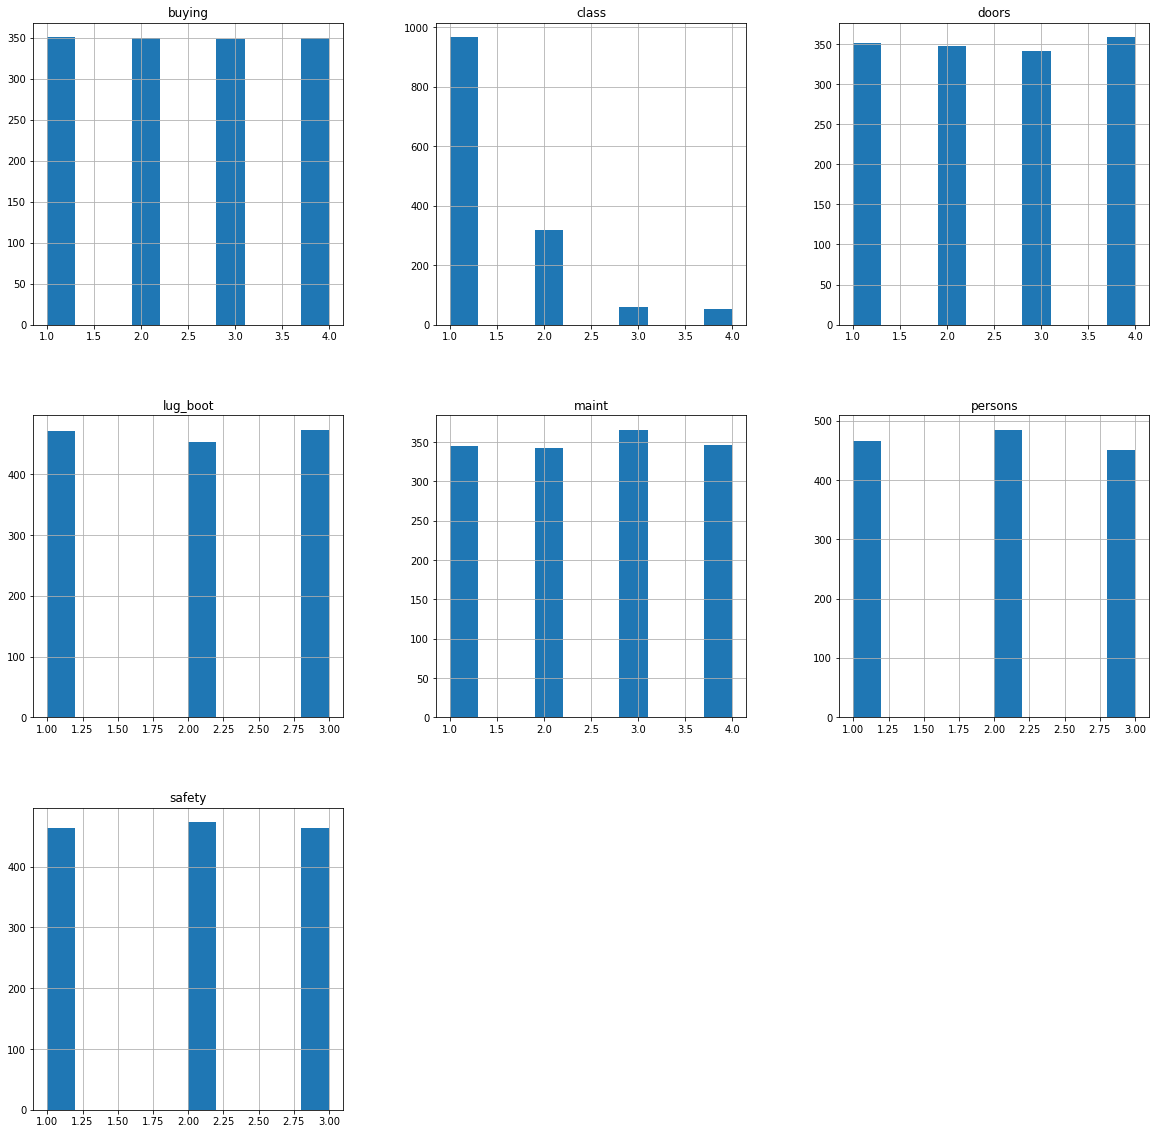

In [31]:
ans = []
for i in range(0,1200):
    l = df_train.iloc[i]
    l = list(l)
    cu = dtree(l,head)
    ans.append(cu)
df_train.hist(bins=10, figsize=(20,20))
print(ans)

[1, 1, 1, 1, 1, 1, 5, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 5, 5, 2, 2, 1, 1, 3, 2, 1, 1, 1, 5, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 4, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 3, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1, 1, 1, 1, 3, 1, 2, 5, 4, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 5, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 2, 2, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 5, 1, 1, 2, 1, 4, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1, 2, 1, 1, 1, 2, 3, 2, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1]


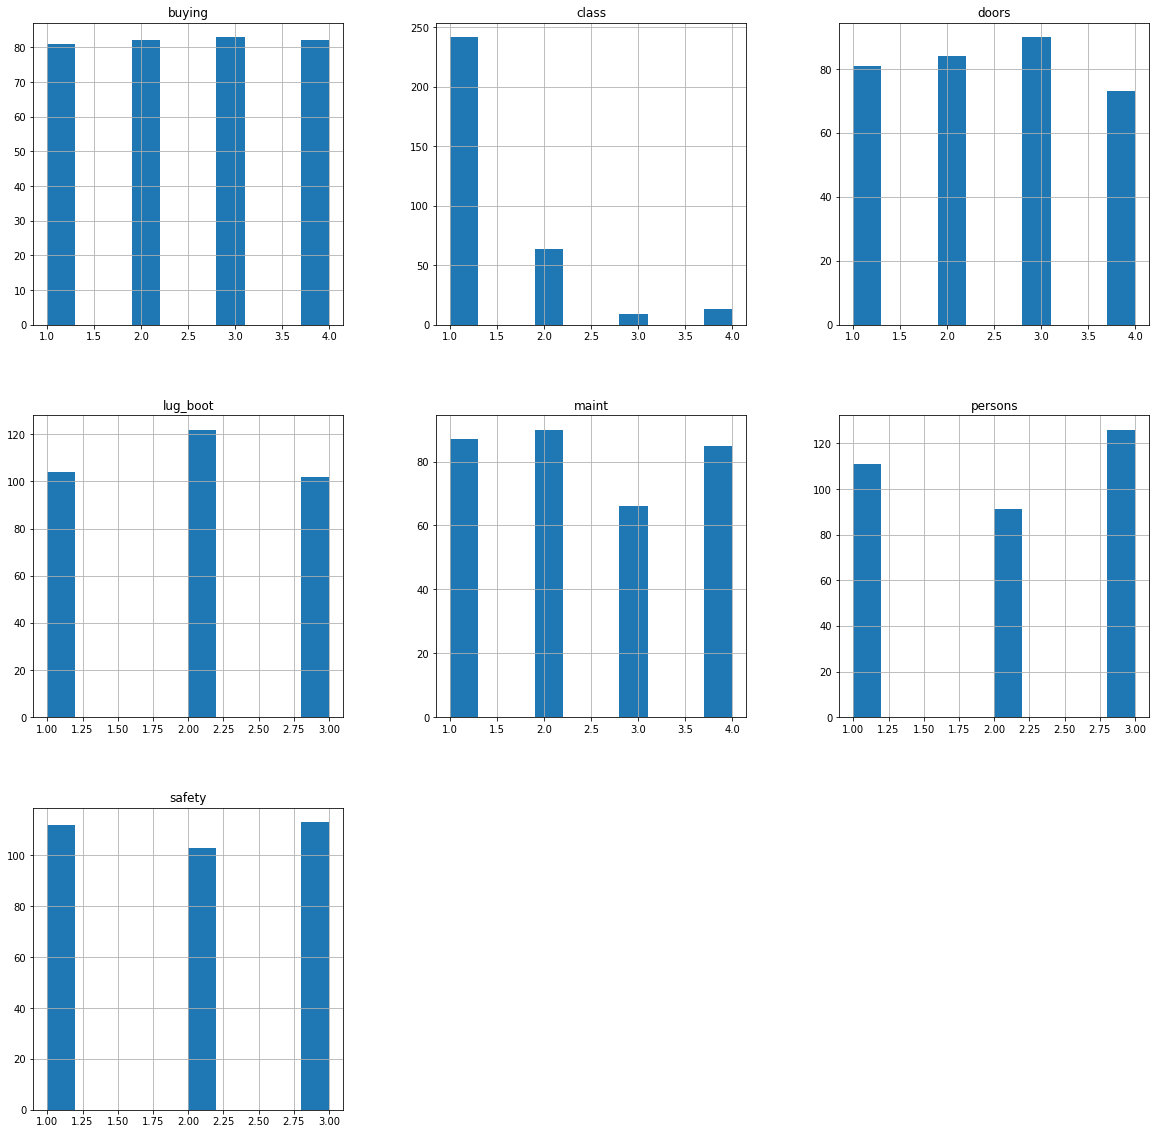

In [32]:
pred = []
for i in range(0,328):
    l = df_test.iloc[i]
    l = list(l)
    cu = dtree(l,head)
    pred.append(cu)
df_test.hist(bins=10, figsize=(20,20))
print(pred)

In [33]:
def CrossEntropy(yHat, y):
    if y == 1:
        try:
            p=-math.log(yHat)
            return p
        except:
            return 100
    else:
        try:
            p=-math.log(1 - yHat)
            return p
        except:
            return 100
        

In [34]:
df_train.iloc[0][6]

1

In [35]:
i = int(input('which loss to calculate=> 1: train, 2:validation'))
def calculateloss(i):
    if(i==1):
        loss = 0
        for i in range(0, 1200):
            loss = loss + CrossEntropy(ans[i], df_train.iloc[i][6])
        print(loss/1200)
    else:
        loss = 0
        for i in range(0, 328):
            loss = loss + CrossEntropy(pred[i], df_test.iloc[i][6])
        print(loss/328)

which loss to calculate=> 1: train, 2:validation1


In [36]:
def get_predictoin():
    print('enter values in space seperated manner:\n')
    d = []
    for i in range(0, 6):
        l = int(input())
        d.append(l)
    a = dtree(l,head)
    print(a)

In [37]:
calculateloss(i)

29.571442992733918


## Practice Code done with some refrences

In [38]:
attributes = list(df_train.columns[:-1])
attributes
#tree = decesionTree(df_train, attributes , 'class')

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [39]:
class decisoinTreeclass:
    def __init__(self, data, attribute, target, tester):
        self.df = data
        self.attribute = attribute
        self.target = target
        self.tester = tester
        self.tree = {}
        self.preds = []
        self.ans = self.df[df.columns[-1]]
        
    def printattribute(self):
        print(self.attribute)
        
    def printtarget(self):
        print(self.target)
    
    def entropy(self, probabilities):
        summation = 0
        for p in probabilities:
            summation += -p*math.log2(p)
        return summation

    def entropyoffeatures(self, series):
        count = Counter(series)
        n = len(series)*1.0
        p = []
        for val in count.values():
            p.append(val/n)
        e = self.entropy(p)
        return e
    
    def testingpurpose1(self):
        k = self.entropyoffeatures(self.tester)
        print(k)
        
    def testingpurpose2(self):
        k = self.infoGain(self.df, self.attribute[0], self.target)
        print(k)
    
    def testingpurpose3(self):
        self.tree = self.decesionTree(self.df, self.attribute, self.target)
    
    def infoGain(self, df, attribute, target):
        te = self.entropyoffeatures(df[target])
        v, c = np.unique(df[attribute], return_counts=True)
        l = []
        for i in range(len(v)):
            f1 = c[i]/np.sum(c)
            ds = df.where(df[attribute] == v[i])
            ds = ds.dropna()[target]
            ee = self.entropyoffeatures(ds)
            l.append(f1*ee)
        we = np.sum(l)
        return te-we
    
    def decesionTree(self, df, attribute, target, allsameclass = None):
        targetclasses = Counter(d for d in df[target])
        if df.empty:
            return allsameclass
        elif len(attribute) == 0:
            return allsameclass
        elif len(targetclasses) == 1:
            return list(targetclasses.keys())[0]
        else:
            allsameclass = np.unique(df[target])[np.argmax(np.unique(df[target],return_counts=True)[1])]
            gainsofdifferentfeature = []
            for feature in attribute:
                gain = self.infoGain(df, feature, target)
                gainsofdifferentfeature.append(gain)
            maxindex = gainsofdifferentfeature.index(max(gainsofdifferentfeature))
            splitfeature = attribute[maxindex]
            mytree = {splitfeature: {}}
            remain = []
            for i in attribute:
                if i!=splitfeature:
                    remain.append(i)
            for attribute_values, split_data in df.groupby(splitfeature):
                subtree = self.decesionTree(split_data, remain, target, allsameclass)
                mytree[splitfeature][attribute_values] = subtree
            return mytree
        
    def predict(self, l, tree, allsameclass=1):
        for i in list(l.keys()):
            if i in list(tree.keys()):
                try:
                    ans = tree[i][l[i]]
                except:
                    return allsameclass
                ans = tree[i][l[i]]
                if isinstance(ans, dict):
                    return self.predict(l, ans)
                else:
                    return ans
    def preprocessinput(self, l):
        i = 0
        dic = {}
        for names in df.columns[:-1]:
            dic[names] = l[i]
            i = i+1
        return dic
        
    def predictionfinal(self):
        mypreds = []
        for i in range(len(self.df)):
#             if i%100==0:
#                 print(self.df.iloc[i])
            d = self.preprocessinput(self.df.iloc[i])
            ans = self.predict(d, self.tree)
            mypreds.append(ans)
        for i in mypreds:
            print(i, end=' ')
        self.preds = mypreds
        return mypreds
    
    def CrossEntropy(self, yHat, y):
        if y == 1:
            try:
                p=-math.log(yHat*100)
                return p/10
            except:
                return 20
        else:
            try:
                p=-math.log((1 - yHat)*100)
                return p/10
            except:
                return 20

    def calculateloss(self):
        loss = 0
        for i in range(0, len(self.df)):
            loss = loss + self.CrossEntropy(self.preds, list(self.ans))
        print(loss/len(self.df))

In [40]:
t = decisoinTreeclass(df_train, attributes, 'class', df_train['class'])

In [41]:
t.printattribute()
t.printtarget()

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
class


In [42]:
t.testingpurpose1()

1.2259876081711778


In [43]:
t.testingpurpose2()

0.09806001837138822


In [44]:
t.testingpurpose3()

In [45]:
ans = t.predictionfinal()

1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 4 1 1 3 2 1 1 2 2 3 1 3 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 2 3 1 1 1 1 1 2 4 1 2 1 1 4 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 2 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 3 2 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 3 2 1 1 1 1 1 4 1 1 3 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 4 1 1 2 2 3 1 4 2 1 1 2 1 1 2 1 2 1 3 2 2 2 1 3 1 1 1 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 4 2 1 1 2 2 1 1 1 1 1 2 1 1 2 2 1 2 1 2 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 4 1 1 2 1 1 2 2 1 3 1 2 1 1 1 1 2 4 1 1 1 2 1 1 1 1 1 1 1 1 4 2 3 1 2 1 1 1 2 1 1 4 1 1 2 1 1 2 1 1 1 4 1 1 2 1 1 2 2 1 2 1 3 1 1 1 1 1 2 1 2 3 1 3 2 1 1 2 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 3 1 1 1 1 1 1 2 1 1 3 1 1 1 1 1 2 2 2 1 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 4 2 2 1 2 1 1 1 1 2 1 1 1 1 2 3 1 1 1 2 2 2 2 2 1 1 2 4 2 1 1 

In [46]:
t.calculateloss()


20.0
